# **실습 2 :  Convolutional Auto Encoder** 


>### Import Module

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, datasets, models, utils

tf.__version__

'2.3.0'

>### Data Load and Preprocessing

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize pixel values
x_train, x_test = x_train/255., x_test/255.

# (60000,784) <- (60000,28,28) : for noise adding
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# (60000,28,28,1) <- (60000,784)
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # [bs H W C]
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))     # [bs H W C]

# Print out the shape
print(x_train.shape)
print(x_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


> ## Model Define

In [3]:
### Functional API ###
i_input = keras.layers.Input(shape=(28, 28, 1)) 

# encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(i_input) #<-(28,28,1)
x = layers.MaxPooling2D((2, 2), padding='same')(x)       #(14,14,32)<-(28,28,32)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)       #(7,7,16)<-(14,14,16)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x) #(4,4,8)<-(7,7,8) 

# decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)                       #(7,7,8)<-(4,4,8)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)                       #(14,14,16)<-(7,7,16)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)                       #(28,28,32)<-(14,14,32)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
                                                         #(28,28,1)<-(28,28,32)

In [4]:
# This autoencoder will map input to reconstructed output
autoencoder = models.Model(inputs=i_input, outputs=decoded)

autoencoder.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 16)          64        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)          

>### Model Compile

In [5]:
# Select optimizer and loss function
autoencoder.compile(optimizer='adam', loss='mse')

>### Training

In [6]:
%%time
history=autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=512,
                validation_data=(x_test, x_test))

Epoch 1/30
118/118 [==============================] - 127s 1s/step - loss: 0.0518 - val_loss: 0.0627
Epoch 2/30
118/118 [==============================] - 134s 1s/step - loss: 0.0273 - val_loss: 0.0309
Epoch 3/30
118/118 [==============================] - 130s 1s/step - loss: 0.0214 - val_loss: 0.0217
Epoch 4/30
118/118 [==============================] - 130s 1s/step - loss: 0.0185 - val_loss: 0.0178
Epoch 5/30
118/118 [==============================] - 131s 1s/step - loss: 0.0166 - val_loss: 0.0160
Epoch 6/30
118/118 [==============================] - 132s 1s/step - loss: 0.0154 - val_loss: 0.0157
Epoch 7/30
118/118 [==============================] - 132s 1s/step - loss: 0.0144 - val_loss: 0.0138
Epoch 8/30
118/118 [==============================] - 132s 1s/step - loss: 0.0136 - val_loss: 0.0133
Epoch 9/30
118/118 [==============================] - 129s 1s/step - loss: 0.0130 - val_loss: 0.0126
Epoch 10/30
118/118 [==============================] - 128s 1s/step - loss: 0.0125 - val_lo

### Predict

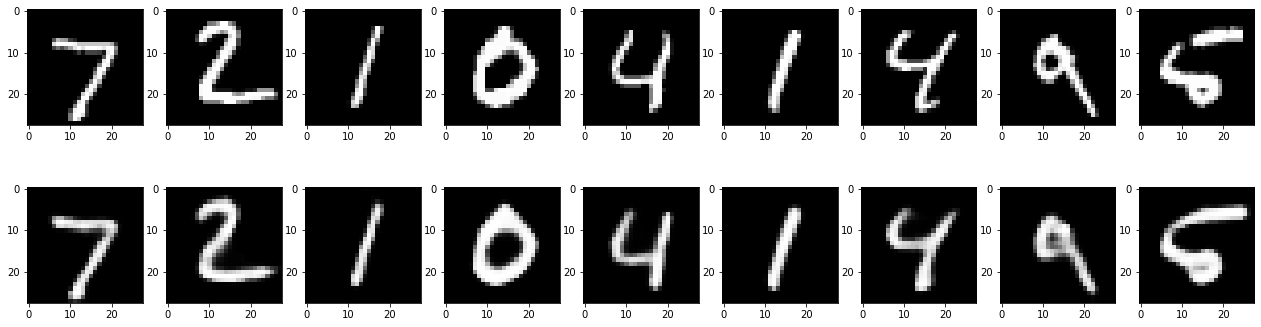

In [7]:
decoded_imgs = autoencoder.predict(x_test)

# Plot
plt.figure(figsize=(22, 6))

num_imgs = 9

for i in range(num_imgs):                        
    # display original
    ax = plt.subplot(2, num_imgs, i + 1)
    true_img = x_test[i].reshape(28, 28)
    plt.imshow(true_img, cmap='gray')

    # display reconstruction 
    ax = plt.subplot(2, num_imgs, i + 1 + num_imgs)
    reconstructed_img = decoded_imgs[i].reshape(28,28)
    plt.imshow(reconstructed_img, cmap='gray')

plt.show()